# **Loan Approval Prediction**

The primary objective of this project is to forecast the likelihood of a loan being sanctioned by the bank. This will be achieved through a comprehensive analysis of various applicant details, such as the loan amount, tenure, CIBIL score, educational background, assets, and other pertinent variables. Through this project, we aim to investigate the determinants of loan approval and establish a predictive model for assessing loan approval status for new applicants. Furthermore, this endeavor will facilitate the provision of prioritized services to customers with a higher probability of loan approval.

# About the dataset

The loan approval dataset comprises financial records and accompanying data that are utilized to assess the eligibility of individuals or organizations seeking loans from a lending institution. This dataset encompasses a range of variables, including CIBIL score, income, employment status, loan duration, loan amount, asset value, and loan approval status. It serves as a fundamental resource in the fields of machine learning and data analysis, where it is employed to construct models and algorithms for forecasting the probability of loan approval based on the provided features.

In [ ]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Loading Datasets
df=pd.read_csv("loan_approval_dataset.csv")

In [ ]:
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


# Data Preprocessing

In [ ]:
#checking shape of dataset
df.shape

(4269, 13)

In [ ]:
# Removing the unnecessary load_id as it is an identifier column

df.drop(columns='loan_id',inplace=True)


In [ ]:
df.shape
df.head()


,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [ ]:
#checking missing or null values

df.isnull().sum()

 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64

In [ ]:
#checking data types in dataset

df.dtypes

 no_of_dependents             int64
 education                   object
 self_employed               object
 income_annum                 int64
 loan_amount                  int64
 loan_term                    int64
 cibil_score                  int64
 residential_assets_value     int64
 commercial_assets_value      int64
 luxury_assets_value          int64
 bank_asset_value             int64
 loan_status                 object
dtype: object

The dataset consists of four types of assets: Residential, Commercial, Luxury, and Bank. I am categorizing these assets into two main groups: Movable and Immovable assets. Specifically, Residential and Commercial assets will be classified as Immovable assets, while Luxury and Bank assets will be categorized as Movable assets.

In [ ]:
# Movable Assets
df['Movable_assets'] = df[' bank_asset_value'] + df[' luxury_assets_value']

#Immovable Assets
df['Immovable_assets'] = df[' residential_assets_value'] + df[' commercial_assets_value']

In [ ]:
df.drop(columns=[' bank_asset_value',' luxury_assets_value',' residential_assets_value',' commercial_assets_value'],inplace=True)

In [ ]:
df

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,loan_status,Movable_assets,Immovable_assets
0,2,Graduate,No,9600000,29900000,12,778,Approved,30700000,20000000
1,0,Not Graduate,Yes,4100000,12200000,8,417,Rejected,12100000,4900000
2,3,Graduate,No,9100000,29700000,20,506,Rejected,46100000,11600000
3,3,Graduate,No,8200000,30700000,8,467,Rejected,31200000,21500000
4,5,Not Graduate,Yes,9800000,24200000,20,382,Rejected,34400000,20600000
...,...,...,...,...,...,...,...,...,...,...
4264,5,Graduate,Yes,1000000,2300000,12,317,Rejected,4100000,3300000
4265,0,Not Graduate,Yes,3300000,11300000,20,559,Approved,12900000,7100000
4266,2,Not Graduate,No,6500000,23900000,18,457,Rejected,25400000,13600000
4267,1,Not Graduate,No,4100000,12800000,8,780,Approved,19900000,8900000


In [ ]:
df.describe()

,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,Movable_assets,Immovable_assets
count,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03
mean,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,2.010300e+07,1.244577e+07
std,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,1.183658e+07,9.232541e+06
min,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,3.000000e+05,-1.000000e+05
25%,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,1.000000e+07,4.900000e+06
50%,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,1.960000e+07,1.060000e+07
75%,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,2.910000e+07,1.820000e+07
max,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,5.380000e+07,4.660000e+07


# Exploratory Data Analysis

During the exploratory data analysis, my focus will be on several key aspects. I will begin by examining the distribution of the data across the variables. Subsequently, I'll explore the relationships between the independent variables and the target variable, as well as assess the correlations among the variables. By utilizing data visualization techniques, I aim to gain insights into potential trends and patterns within the dataset, ultimately unveiling hidden insights that may not be immediately apparent.

Text(0.5, 1.0, 'Number of Dependents')

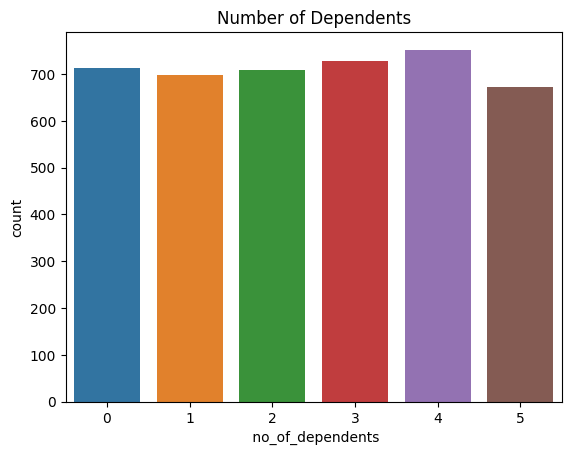

In [ ]:
# Number of Dependents
sns.countplot(x = ' no_of_dependents', data = df).set_title('Number of Dependents')

The graph displays the count of dependents for loan applicants. Most applicants have 3 or 4 dependents. Typically, more dependents mean lower disposable income. Therefore, those with 0 or 1 dependent likely have higher chances of loan approval.

### Education and Income

<Axes: xlabel=' education', ylabel=' income_annum'>

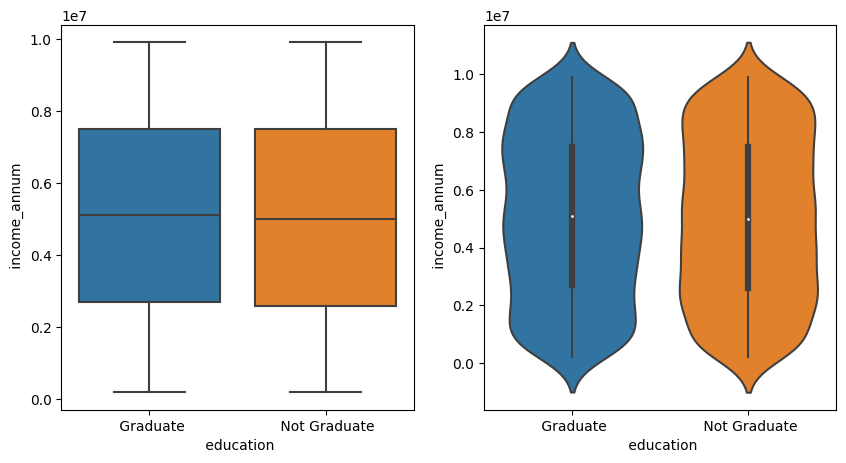

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(10, 5))
sns.boxplot(x = ' education', y = ' income_annum', data = df, ax=ax[0])
sns.violinplot(x = ' education', y = ' income_annum', data = df, ax=ax[1])


These two graphs - boxplot and violinplot visualizes the education of applicants along
with their annual income. The boxplot shows some interesting fact that both the
graduates and non-graduates have nearly same median income with very small increase
in income of graduates. Moreover the violinplot shows the distribution of income among
the graduates and non graduate applicants, where we can see that non graduate
applicants have a even distribution between income 2000000 and 8000000, whereas
there is a uneven distribution among the graduates with more applicants having income
between 6000000 and 8000000. Since there is not much change in annual income of
graduates and non graduates, I assume that education does not play a major role in the
approval of loan.

### Employment Status and Education


Text(0.5, 1.0, 'Self Employed')

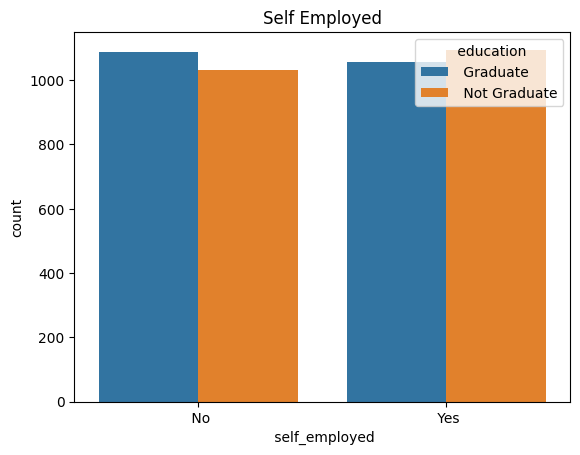

In [ ]:
sns.countplot(x=' self_employed', data = df, hue = ' education').set_title('Self Employed')

This graph shows the number of self employed applicants along with their education. From the educational prepespective the majority of the graducate applicants are not self employed wheareas majority of the non-graduates are self employed. This means that graduates applicants are more likely to be salaried employees and non-graduates are more likely to be self employed. This could be a determining factor in loan approval because salaried employees are more likely to have a stable income and hence are more likely to pay back the loan as compared to self employed applicants whose income may not be stable. But this could also be possible that the self employed applicants are earning more than the salaried employees and hence are more likely to pay back the loan. This is a very important factor to consider while predicting the loan approval.

#### Loan Amount and Tenure

Text(0.5, 1.0, 'Loan Amount vs. Loan Term')

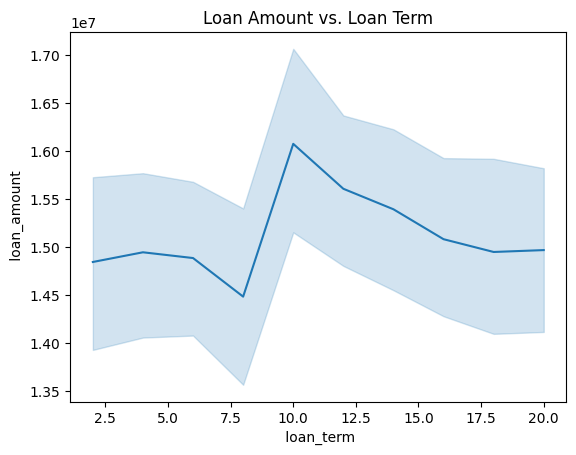

In [ ]:
sns.lineplot(x = ' loan_term', y = ' loan_amount', data = df).set_title('Loan Amount vs. Loan Term')

This line plot displays the relationship between the loan amount and the duration of the loan. It indicates that for loan tenures ranging from 2.5 to 7.5 years, the loan amount typically falls within the range of 1,400,000 to 1,550,000. However, it's worth noting that the loan amount noticeably increases for loan tenures of 10 years.

#### CIBIL Score Distribution

<Axes: xlabel=' cibil_score', ylabel='Count'>

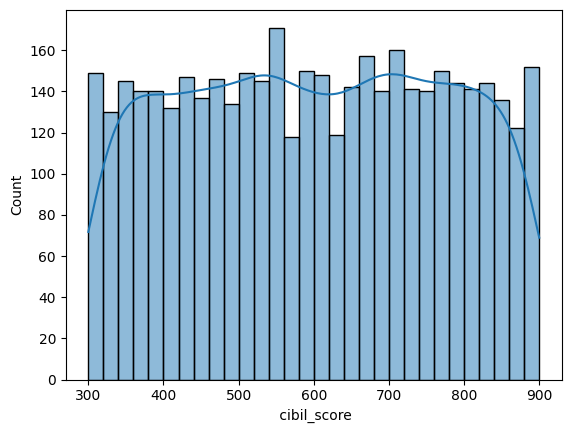

In [ ]:
sns.histplot(df[' cibil_score'], bins = 30, kde = True )

Before looking at the cibil score, lets have a look at the cibil score ranges and their meaning.


|Cibil Score|Meaning|
|---|---|
|300-549|Poor|
|550-649|Fair|
|650-749|Good|
|750-799|Very Good|
|800-900|Excellent|

Source: [godigit.com](https://www.godigit.com/finance/credit-score/ranges-of-credit-score)

Referring to the table above, it's evident that a significant portion of customers have CIBIL scores below 649, which can potentially hinder their loan applications. However, there is a notable group of applicants with CIBIL scores above 649, and this is promising for the bank. The bank can focus on these customers and offer them priority services, as well as special deals and discounts to entice them to choose the bank for their loans.

Based on this observation, I hypothesize that customers with CIBIL scores above 649 have a higher likelihood of getting their loan applications approved.

#### Asset Distribution

<Axes: xlabel='Immovable_assets', ylabel='Count'>

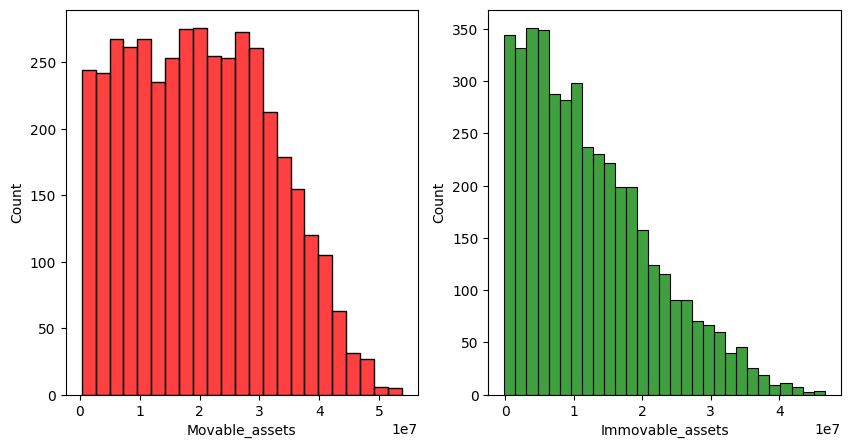

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(10,5))
sns.histplot(df['Movable_assets'], ax=ax[0], color='red')
sns.histplot(df['Immovable_assets'], ax=ax[1], color='green')

Assets are a crucial factor in loan applications because they provide the bank with a form of security, ensuring that the borrower can repay the loan. As previously mentioned, I've categorized assets into two groups: movable and immovable assets. The graphs above depict the distribution of these asset categories in the dataset.

Regarding movable assets, which encompass bank assets and luxury assets, most applicants possess assets valued at less than 30 million, and there is a slight decrease in the number of applicants as the value of movable assets increases.

When it comes to immovable assets, which include residential and commercial properties, the majority of applicants have assets valued at less than 15 million. Additionally, there's a strong trend of decreasing applicant numbers as the value of immovable assets surpasses 20 million.

In the exploratory data analysis (EDA) conducted so far, I've delved into the data's distribution across various features and established relationships between some variables, forming initial assumptions and hypotheses. To validate these assumptions and hypotheses, my next step involves examining the visual representations of how independent variables relate to the target variable.

#### Number of Dependants Vs Loan Status

<Axes: xlabel=' no_of_dependents', ylabel='count'>

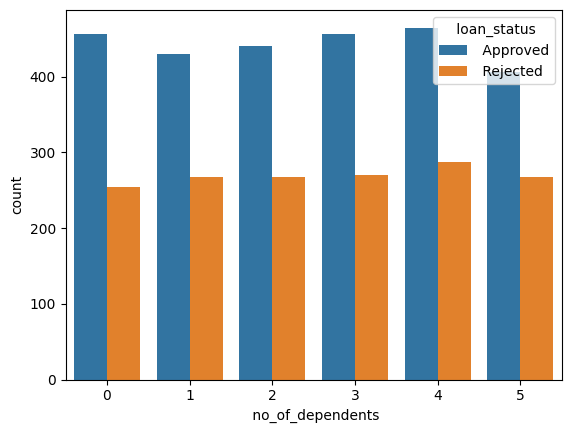

In [ ]:
sns.countplot(x = ' no_of_dependents', data = df, hue = ' loan_status')


My hypothesis about the relationship between loan approval and the number of dependents has yielded mixed results. Initially, it appeared that the hypothesis held some truth in terms of the likelihood of loan rejections, as the number of rejections increased with the number of dependents. However, the hypothesis did not hold when it came to loan approvals. Contrary to my initial assumption, the graph indicates that there hasn't been a significant change in the count of loan approvals with an increase in the number of dependents. Thus, it appears that my hypothesis concerning loan approval based on the number of dependents is not accurate.

#### Education Vs Loan Status

Text(0.5, 1.0, 'Loan Status by Education')

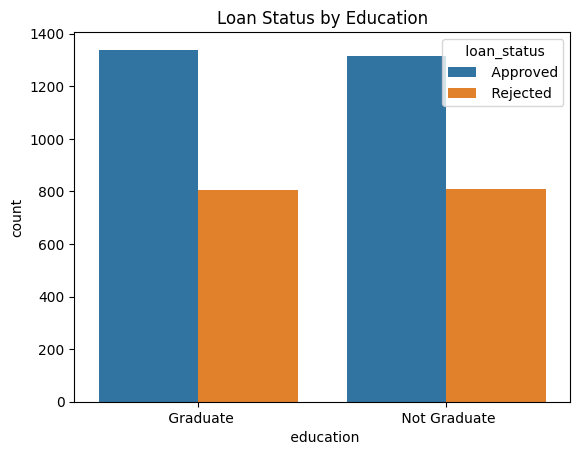

In [ ]:
sns.countplot(x = ' education', hue = ' loan_status', data = df).set_title('Loan Status by Education')

My hypothesis that education is not a significant factor in loan approval has been confirmed by the data. The graph illustrates only a minor difference in the count of loan approvals and rejections for both graduate and non-graduate applicants. This difference is not substantial, suggesting that education level does not play a decisive role in the loan approval process.

#### Annual Income vs Loan Status

<Axes: xlabel=' loan_status', ylabel=' income_annum'>

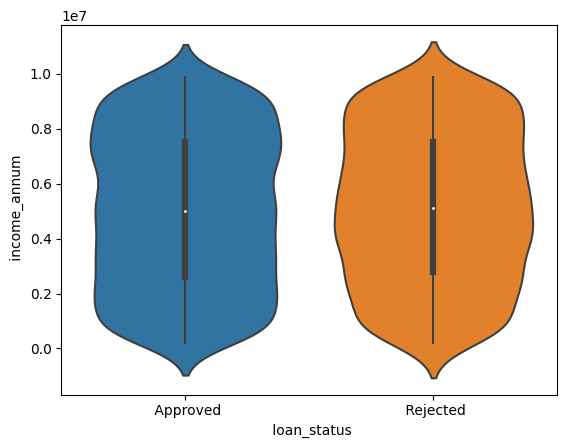

In [ ]:
sns.violinplot(x=' loan_status', y=' income_annum', data=df)

Overall, there isn't a significant difference in the annual incomes of applicants with approved or rejected loans. However, it's worth noting that the approved loan applicants tend to have slightly higher annual incomes compared to the rejected applicants. This can be observed from the violin plot, where the approved loan applicants have a higher density in the annual income range near 8 million.

#### Loan amount & tenure Vs Loan Status

<Axes: xlabel=' loan_term', ylabel=' loan_amount'>

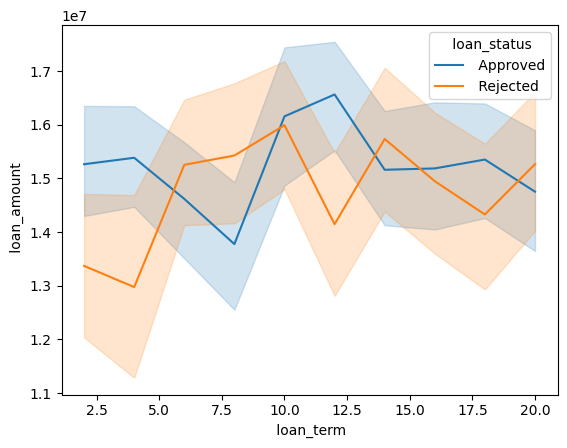

In [ ]:
sns.lineplot(x=' loan_term', y=' loan_amount', data=df, hue=' loan_status')

This graph illustrates the connection between loan amount, loan tenure, and loan status. In general, approved loans typically feature higher loan amounts and shorter repayment tenures. Conversely, rejected loans often have lower loan amounts and longer repayment tenures.

This pattern might be attributed to the bank's loan policy, where longer repayment tenures could lead to higher rejection rates. Additionally, the bank may choose to decline loans with lower amounts since they might not be as financially viable or profitable for the institution.

#### CIBIL Score Vs Loan Status

<Axes: xlabel=' loan_status', ylabel=' cibil_score'>

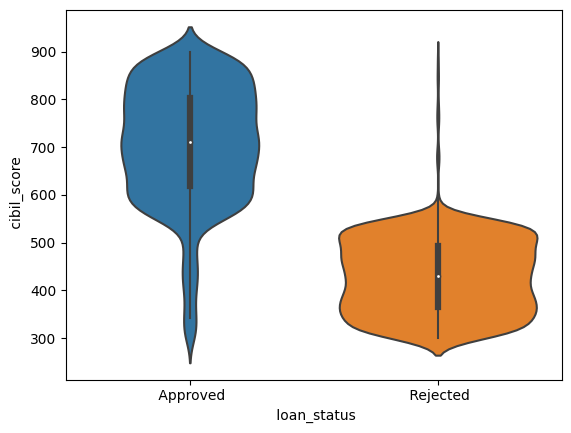

In [ ]:
sns.violinplot(x=' loan_status', y=' cibil_score', data=df)

My hypothesis regarding the cibil score and loan approval is absolutely correct. It is evident through the violinplot, where the there is a high distribution above 600 cibil score from the loan approved category. The distribution of the loan not approved category is more spread out and has cibil score less than 550. This also proves my assumption that majority of the applicants have a poor/fair cibil score which affects their loan approval. Hence, having a high cibil score particularly grater than 600 would definitely increase the chances of loan approval.



#### Assets Vs Loan Status

<Axes: xlabel='Immovable_assets', ylabel='Count'>

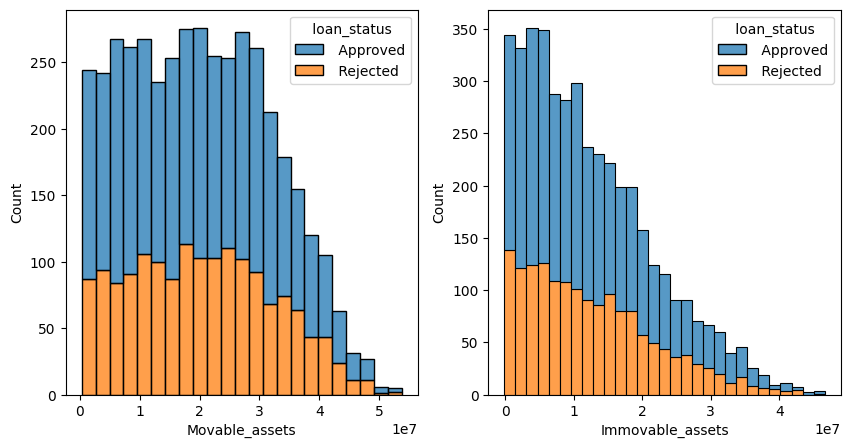

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(10,5))
sns.histplot(x  = 'Movable_assets', data = df, ax=ax[0], hue = ' loan_status', multiple='stack')
sns.histplot(x =  'Immovable_assets', data = df, ax=ax[1], hue  = ' loan_status', multiple='stack')

Assets provide security to the bank against which the loan is issued. These two graph visualizes the relation between the movable and immovable assets along with the loan status. The both graph shows that, with increase in the assets the chances of loan approval increases and rejection decreases. The graph also shows that, the movable assets are more than the immovable assets.

## Data Preprocessing 2

#### Label Encoding the categorical variables

In [ ]:
# Label Encoding
df[' education'] = df[' education'].map({' Not Graduate':0, ' Graduate':1})
df[' self_employed'] = df[' self_employed'].map({' No':0, ' Yes':1})
df[' loan_status'] = df[' loan_status'].map({' Rejected':0, ' Approved':1})

In [ ]:
df.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,loan_status,Movable_assets,Immovable_assets
0,2,1,0,9600000,29900000,12,778,1,30700000,20000000
1,0,0,1,4100000,12200000,8,417,0,12100000,4900000
2,3,1,0,9100000,29700000,20,506,0,46100000,11600000
3,3,1,0,8200000,30700000,8,467,0,31200000,21500000
4,5,0,1,9800000,24200000,20,382,0,34400000,20600000


## Coorelation Matrix Heatmap

<Axes: >

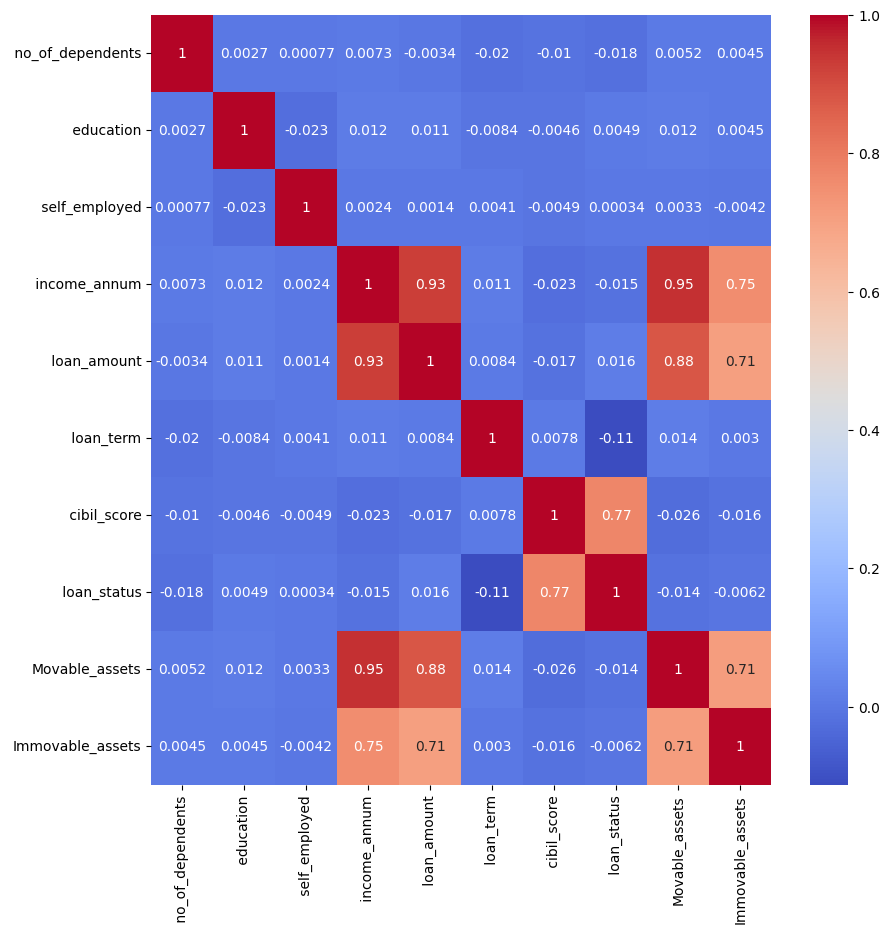

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot = True,cmap='coolwarm')

The correlation matrix heatmap highlights several strong correlations within the dataset:

1. Movable Assets and Immovable Assets
2. Income and Movable Assets
3. Income and Immovable Assets
4. Movable Assets and Loan Amount
5. Immovable Assets and Loan Amount
6. Loan Status and CIBIL Score
7. Loan Amount and Income

The correlation between movable and immovable assets is sensible because both fall under the broader category of assets, so it's expected that individuals with more movable assets may also have more immovable assets, and vice versa. Similarly, the correlations between income and movable assets, as well as income and immovable assets, make sense because higher income often leads to greater asset accumulation.

In essence, these strong correlations underscore the relationships between these variables and provide valuable insights into their interplay within the dataset.

Next, I will delve into the correlations between assets and loan amounts, as well as between income and loan amounts. Please note that in a previous section, we've already examined the connection between loan status and CIBIL scores.

#### Assets Vs Loan Amount

Text(0.5, 1.0, 'Immovable_assets vs loan_amount')

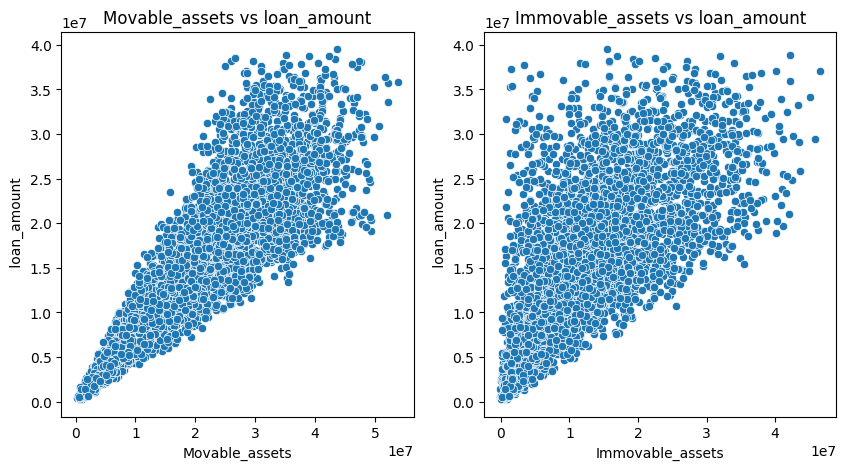

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(10, 5))
sns.scatterplot(x='Movable_assets', y = ' loan_amount', data = df, ax=ax[0]).set_title('Movable_assets vs loan_amount')
sns.scatterplot(x='Immovable_assets', y = ' loan_amount', data = df, ax=ax[1]).set_title('Immovable_assets vs loan_amount')


The loan amount has positive relation with movable and immovable assets. The more the assets, the more the loan amount issued by the bank.

#### Loan Amount Vs Income

<Axes: xlabel=' income_annum', ylabel=' loan_amount'>

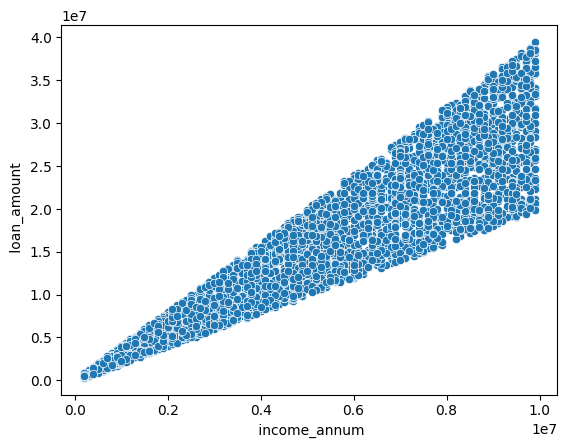

In [ ]:
sns.scatterplot(x=' income_annum', y = ' loan_amount', data = df)

The loan amount and applicant's annual income have a very direct relation between them. The higher the income, the higher the loan amount. This is because the applicant's income is the main factor in deciding the how much loan needed.

## Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop(' loan_status', axis=1), df[' loan_status'], test_size=0.2, random_state=42)

## Model Building

I will be using the following machine learning models to predcit the loan approval status:
1. Decision Tree Classifier
2. Random Forest Classifier

#### Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Create decision tree object
dtree = DecisionTreeClassifier()

In [ ]:
# Trainign the model using the training data
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
# Training Accuracy
dtree.score(X_train, y_train)

1.0

In [ ]:
# Predicting the Loan Approval Status
dtree_pred = dtree.predict(X_test)

In [ ]:
dtree_pred

array([0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0,

#### Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Create a random forest classifier
rfc = RandomForestClassifier()

In [ ]:
# Training the model using the training data
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
# Training Accuracy
rfc.score(X_train, y_train)

1.0

In [ ]:
# Predicting the Loan Approval Status
rfc_pred = rfc.predict(X_test)

In [ ]:
rfc_pred

array([0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0,

## Model Evalution

#### Confusion Matrix

Text(518.4494949494949, 0.5, 'Actual')

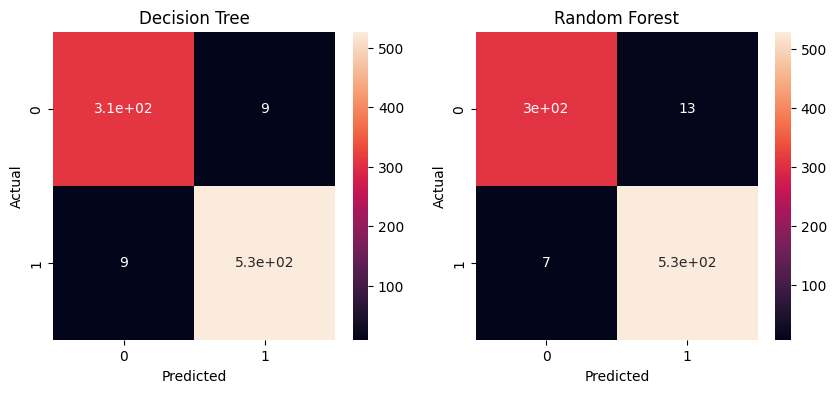

In [ ]:
from sklearn.metrics import confusion_matrix

fig, ax = plt.subplots(1,2,figsize=(10,4))
sns.heatmap(confusion_matrix(y_test, dtree_pred), annot=True, ax=ax[0]).set_title('Decision Tree')
ax[0].set_xlabel('Predicted')
ax[0].set_ylabel('Actual')
sns.heatmap(confusion_matrix(y_test, rfc_pred), annot=True, ax=ax[1]).set_title('Random Forest')
ax[1].set_xlabel('Predicted')
ax[1].set_ylabel('Actual')

The confusion matrix heatmap presented above illustrates the counts of true positives and true negatives for both machine learning models. Specifically, the decision tree classifier shows only 17 instances of false positive and false negative values, while the random forest classifier has 21 such cases. This indicates that the decision tree classifier boasts higher accuracy when compared to the random forest classifier.

#### Distribution Plot

<ipython-input-47-5835b6d4877e>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot( x = y_test, hist = False, color = "r", label = "Actual Value")
<ipython-input-47-5835b6d4877e>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot( x = dtree_pred, hist = False, color = "b", lab

Text(0.5, 1.0, 'Actual vs Fitted Values for Decsion Tree Classfier')

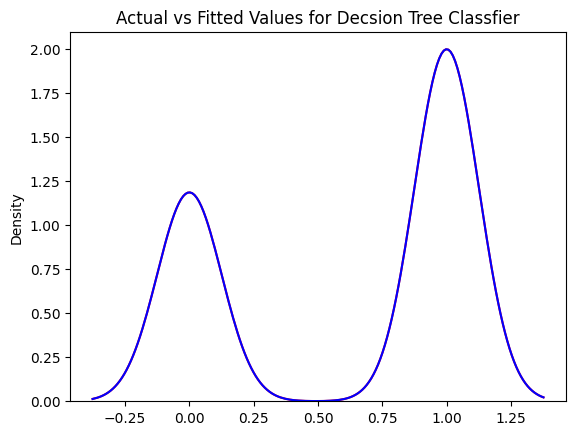

In [ ]:
ax = sns.distplot( x = y_test, hist = False, color = "r", label = "Actual Value")
sns.distplot( x = dtree_pred, hist = False, color = "b", label = "Fitted Values", ax = ax)
plt.title('Actual vs Fitted Values for Decsion Tree Classfier')

<ipython-input-48-3a716ab27357>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot( x = y_test, hist = False, color = "r", label = "Actual Value")
<ipython-input-48-3a716ab27357>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot( x = rfc_pred, hist = False, color = "b", label

Text(0.5, 1.0, 'Actual vs Fitted Values for Random Forest Classfier')

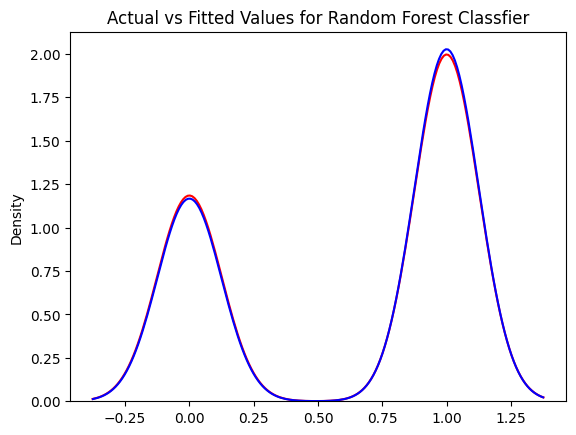

In [ ]:
ax = sns.distplot( x = y_test, hist = False, color = "r", label = "Actual Value")
sns.distplot( x = rfc_pred, hist = False, color = "b", label = "Fitted Values", ax = ax)
plt.title('Actual vs Fitted Values for Random Forest Classfier')

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, dtree_pred))
print(classification_report(y_test, rfc_pred))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       318
           1       0.98      0.98      0.98       536

    accuracy                           0.98       854
   macro avg       0.98      0.98      0.98       854
weighted avg       0.98      0.98      0.98       854

              precision    recall  f1-score   support

           0       0.98      0.96      0.97       318
           1       0.98      0.99      0.98       536

    accuracy                           0.98       854
   macro avg       0.98      0.97      0.97       854
weighted avg       0.98      0.98      0.98       854



In [ ]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Decision Tree Classifier
print('R2 score: ', r2_score(y_test, dtree_pred))
print('Mean Squared Error: ', mean_squared_error(y_test, dtree_pred))
print('Mean Absolute Error: ', mean_absolute_error(y_test, dtree_pred))
print('\n')
# Random Forest Classifier
print('R2 score: ', r2_score(y_test, rfc_pred))
print('Mean Squared Error: ', mean_squared_error(y_test, rfc_pred))
print('Mean Absolute Error: ', mean_absolute_error(y_test, rfc_pred))

R2 score:  0.9098141368628555
Mean Squared Error:  0.02107728337236534
Mean Absolute Error:  0.02107728337236534


R2 score:  0.8997934854031728
Mean Squared Error:  0.0234192037470726
Mean Absolute Error:  0.0234192037470726


Based on the comprehensive analysis of all the metrics, graphs, and reports provided, my conclusion is that the decision tree classifier is the superior machine learning model for predicting an individual's loan approval status.

## Conclusion

Based on the exploratory data analysis, the following factors have been identified as important for loan approval:

- CIBIL Score: Applicants with higher CIBIL scores are more likely to have their loans approved.
- Number of Dependents: A greater number of dependents may reduce the likelihood of loan approval.
- Assets: Having more assets, whether movable or immovable, increases the chances of loan approval.
- Loan Amount and Tenure: Higher loan amounts with shorter repayment tenures are associated with a higher probability of loan approval.

In the context of machine learning models, both the Decision Tree Classifier and Random Forest Classifier were employed, and both models produced excellent results with accuracies of 91.4% and 89.4%, respectively. However, the Decision Tree Classifier